In [1]:
from models.MLP_class  import MLPFeatureSelectionCV, MLPLimeAnalyzer, MLPWithLimeRanking

Added 33 new rows for class G1.
Current class distribution:
 target
G3    75
G2    57
G1    53
Name: count, dtype: int64
(185, 261)
Added 33 new rows for class G1.
Current class distribution:
 target
G3    75
G2    57
G1    53
Name: count, dtype: int64
(185, 261)


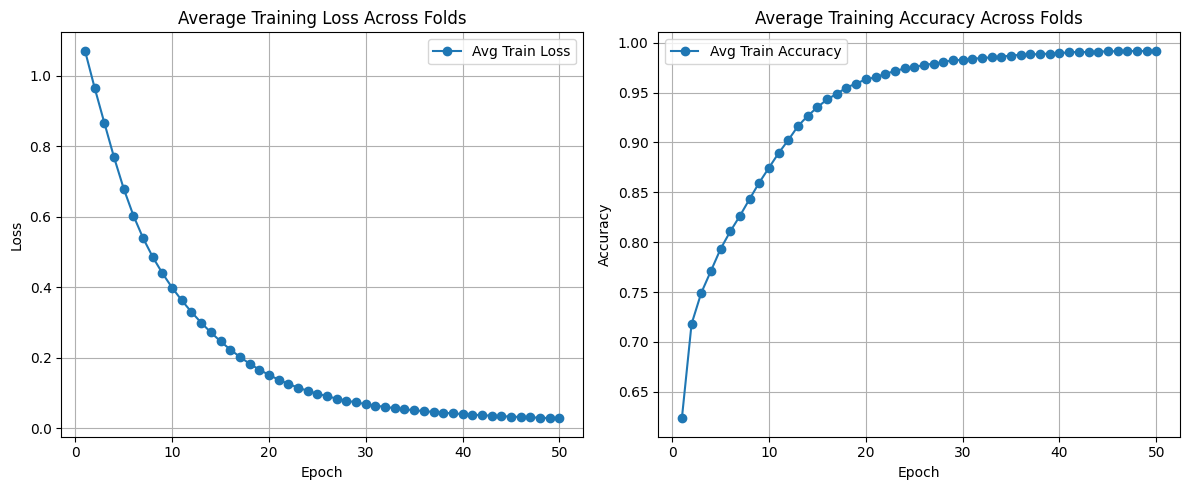


Cross-validation results (averages) for different feature counts:
    num_features  cv_accuracy  cv_f1_macro    cv_mcc
0             10     0.827027     0.825409  0.740757
1             20     0.870270     0.872422  0.805468
2             30     0.870270     0.871509  0.805935
3             40     0.870270     0.874184  0.804676
4             50     0.870270     0.872334  0.803449
5             60     0.859459     0.861488  0.788017
6             70     0.864865     0.868023  0.796333
7             80     0.870270     0.875015  0.806437
8             90     0.810811     0.816827  0.717401
9            100     0.875676     0.877149  0.813074
10           110     0.848649     0.852139  0.771939
11           120     0.859459     0.861414  0.789555
12           130     0.854054     0.857777  0.779319
13           140     0.843243     0.845723  0.764084
14           150     0.837838     0.841150  0.754640
15           160     0.848649     0.849153  0.772687
16           170     0.859459   

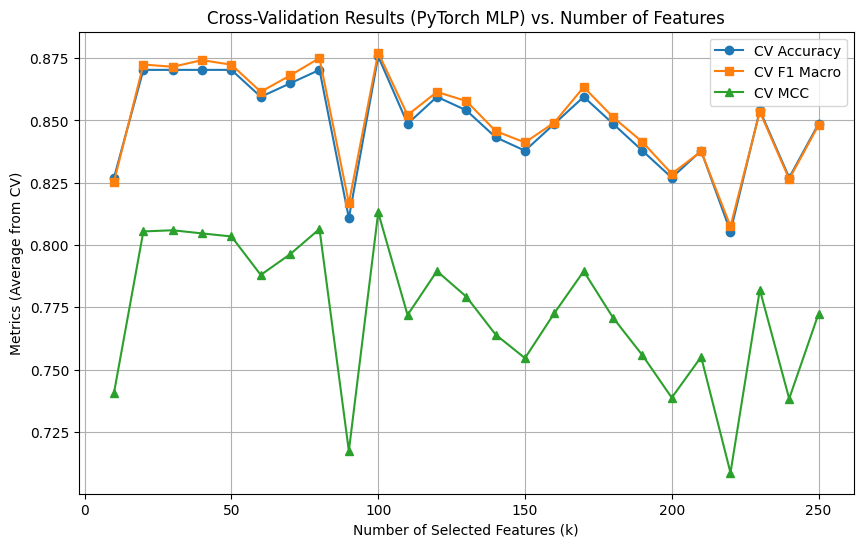

Added 33 new rows for class G1.
Current class distribution:
 target
G3    75
G2    57
G1    53
Name: count, dtype: int64
(185, 261)
Added 33 new rows for class G1.
Current class distribution:
 target
G3    75
G2    57
G1    53
Name: count, dtype: int64
(185, 261)
Training best model for permutation importance evaluation...
Permutation Importance Ranking for best model:
1. max_zernike_22: Importance Score = 0.0595
2. cv_zernike_18: Importance Score = 0.0541
3. max_zernike_1: Importance Score = 0.0541
4. cv_region_id: Importance Score = 0.0486
5. min_kurtosis_intensity: Importance Score = 0.0432
6. max_zernike_18: Importance Score = 0.0378
7. cv_hu_moment_1: Importance Score = 0.0378
8. cv_area: Importance Score = 0.0378
9. max_bounding_box_height: Importance Score = 0.0324
10. std_area: Importance Score = 0.0324
11. max_perimeter: Importance Score = 0.0324
12. std_GLCM_energy: Importance Score = 0.0324
13. max_area: Importance Score = 0.0324
14. min_skew_intensity: Importance Score = 0.

In [2]:
mlp_cv = MLPFeatureSelectionCV(
    data_path="all_data.csv",
    do_imputation=True,     # Set to True if you want imputation
    random_state=42,
    n_splits=5,
    n_epochs=50,
    hidden_dim=64,
    # feature_counts=[50, 60, 70, 80]  # or use the default range
)

results_df = mlp_cv.run()
print(results_df.head())


In [2]:
analyzer = MLPLimeAnalyzer(
    data_path="all_data.csv",
    do_imputation=True,    # Set True if imputation is needed
    random_state=42,
    n_epochs=50,
    hidden_dim=64,
    batch_size=32
)
lime_ranking = analyzer.run()

Added 33 new rows for class G1.
Current class distribution:
 target
G3    75
G2    57
G1    53
Name: count, dtype: int64
(185, 261)
Training MLP for LIME analysis...
Epoch 50/50 | Train Loss: 0.0017
Running LIME explanations...
Global LIME Feature Ranking:
1. min_kurtosis_intensity > 0.06: 0.1021
2. max_zernike_1 > 0.72: 0.0954
3. std_region_id > 0.44: 0.0835
4. cv_zernike_1 > 0.55: 0.0797
5. max_zernike_1 <= -0.75: 0.0752
6. min_hu_moment_4 > -0.09: 0.0729
7. max_mean_intensity > 0.61: 0.0700
8. max_zernike_24 > -0.02: 0.0698
9. max_mean_intensity <= -0.65: 0.0694
10. max_GLCM_contrast > 0.21: 0.0671
11. max_std_intensity <= -0.69: 0.0669
12. zernike_16 > 0.69: 0.0664
13. max_region_id > 0.45: 0.0659
14. min_zernike_20 > 0.04: 0.0654
15. mean_intensity > 0.63: 0.0640
16. cv_zernike_5 > 0.62: 0.0619
17. max_zernike_11 > 0.29: 0.0613
18. std_zernike_19 <= -0.80: 0.0611
19. min_kurtosis_intensity <= -0.49: 0.0606
20. min_hu_moment_3 > 0.13: 0.0604
21. min_GLCM_correlation <= -1.14: 0.060

In [ ]:
mlp_lime = MLPWithLimeRanking(
    data_path="all_data.csv",
    do_imputation=True,        # or False if no missing data
    random_state=42,
    n_epochs=30,
    hidden_dim=64,
    batch_size=32,
    lime_samples=10,
    feature_counts=[5, 10, 20, 30, 40, 50, 60, 80, 100, 120, 150, 200, 250]
)
results_df = mlp_lime.run()
print("\nFinal CV Results:")
print(results_df)